In [8]:
import pandas as pd
import numpy as np

# Tools for recursive feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Tools for fitting logistic regression and getting p-values
import statsmodels.api as sm

# For plotting
import matplotlib.pyplot as plt

# Our local, useful functions
from baseball_utils import *

In [2]:
# Load dataframe
cp_df = pd.read_csv("cp_merged.csv")

## Feature elimination effects for white umpire

In [3]:
white_umpires = cp_df[cp_df.umpire_race == 'white']

In [4]:
%time X, y = prepare_df(white_umpires)

/Users/robertair2019/Desktop/upm/baseball_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['strike_given_called'] = df['strike_given_called'].apply(int)
/Users/robertair2019/Desktop/upm/baseball_utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['upm'] = df.apply(lambda x: x.pitcher_race==x.umpire_race, axis=1).apply(int)


CPU times: user 32.5 s, sys: 335 ms, total: 32.8 s
Wall time: 32.2 s


In [5]:
ranked_features = rank_features(X, y)

In [6]:
ranked_features

['count_0-2',
 'count_1-2',
 'count_2-2',
 'count_3-0',
 'count_3-2',
 'count_0-1',
 'count_1-1',
 'count_2-1',
 'count_3-1',
 'count_1-0',
 'inning_6',
 'inning_4',
 'inning_7',
 'inning_5',
 'inning_8',
 'inning_9+',
 'home_pitcher',
 'inning_3',
 'count_2-0',
 'run_diff',
 'inning_2',
 'upm']

In [11]:
n_features, beta, p = eliminate_features(X, y, ranked_features)

Fitting 22 variables...
Optimization terminated successfully.
         Current function value: 0.581129
         Iterations 6
Beta = 0.005284723250301279; p = 0.2754771485067118
Fitting 21 variables...
Optimization terminated successfully.
         Current function value: 0.581130
         Iterations 6
Beta = 0.0053008685114982; p = 0.27401162039038596
Fitting 20 variables...
Optimization terminated successfully.
         Current function value: 0.581342
         Iterations 6
Beta = 0.005502913621090046; p = 0.25603127399434567
Fitting 19 variables...
Optimization terminated successfully.
         Current function value: 0.581346
         Iterations 6
Beta = 0.005462192759870462; p = 0.25956117157570935
Fitting 18 variables...
Optimization terminated successfully.
         Current function value: 0.581356
         Iterations 6
Beta = 0.005470113657616598; p = 0.25886545946312467
Fitting 17 variables...
Optimization terminated successfully.
         Current function value: 0.581396
    

In [46]:
def plot_beta(beta, n_features, title, outfile):
    plt.figure(figsize=(9,7))
    plt.ylim(min(min(beta), 0), max(0,max(beta)))
    plt.plot(n_features, beta)
    plt.xlabel("Number of features")
    plt.ylabel("UPM Coefficient")
    plt.xticks(n_features)
    plt.title(title)
    plt.savefig(outfile)
    plt.show()

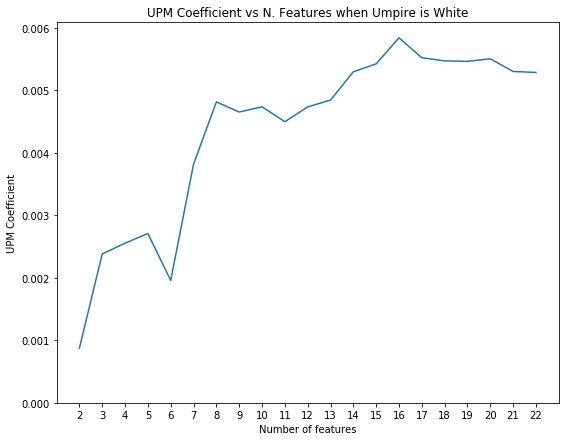

In [19]:
plot_beta(beta, n_features, "UPM Coefficient vs N. Features when Umpire is White", "upm_vs_n_white_umpire.png")

In [32]:
def plot_pvalues (p, n_features, title, outfile):
    plt.figure(figsize=(9,7))
    plt.ylim(0,1)
    plt.plot(n_features, p)
    plt.xlabel("Number of features")
    plt.ylabel("UPM p-value")
    plt.title(title)
    plt.xticks(n_features)
    plt.savefig(outfile)

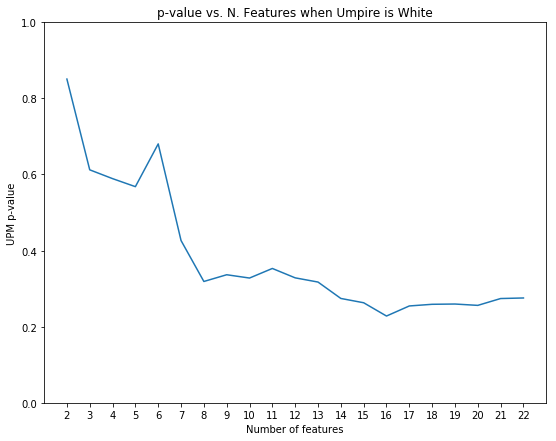

In [33]:
plot_pvalues(p, n_features, "p-value vs. N. Features when Umpire is White", "p_vs_n_white_umpire.png")

In [15]:
beta_white = beta[0]
beta_white

0.005284723250301279

In [16]:
p_white = p[0]
p_white

0.2754771485067118

## Feature elimination effects for black umpire

In [17]:
black_umpires = cp_df[cp_df.umpire_race == 'black']

In [34]:
%time X_black, y_black = prepare_df(black_umpires)

CPU times: user 2.33 s, sys: 36.2 ms, total: 2.36 s
Wall time: 2.32 s


In [35]:
%time ranked_features = rank_features(X_black, y_black)

CPU times: user 2.11 s, sys: 65.3 ms, total: 2.18 s
Wall time: 2.2 s


In [36]:
ranked_features

['count_0-2',
 'count_1-2',
 'count_2-2',
 'count_3-2',
 'count_0-1',
 'count_1-1',
 'count_3-0',
 'count_2-1',
 'count_3-1',
 'count_1-0',
 'inning_4',
 'inning_2',
 'inning_3',
 'count_2-0',
 'upm',
 'inning_7',
 'inning_6',
 'inning_8',
 'inning_9+',
 'inning_5',
 'run_diff',
 'home_pitcher']

In [37]:
%time n_features, beta, p = eliminate_features(X_black, y_black, ranked_features)

Fitting 22 variables...
Optimization terminated successfully.
         Current function value: 0.578704
         Iterations 6
Beta = -0.0675343695363255; p = 0.04903395246543318
Fitting 21 variables...
Optimization terminated successfully.
         Current function value: 0.578704
         Iterations 6
Beta = -0.06737452819173258; p = 0.049538448501249784
Fitting 20 variables...
Optimization terminated successfully.
         Current function value: 0.578759
         Iterations 6
Beta = -0.06796976317231496; p = 0.0475370954433381
Fitting 19 variables...
Optimization terminated successfully.
         Current function value: 0.578760
         Iterations 6
Beta = -0.06801613885516661; p = 0.0473829505205933
Fitting 18 variables...
Optimization terminated successfully.
         Current function value: 0.578761
         Iterations 6
Beta = -0.06935246210914332; p = 0.04235155662626886
Fitting 17 variables...
Optimization terminated successfully.
         Current function value: 0.578771
   

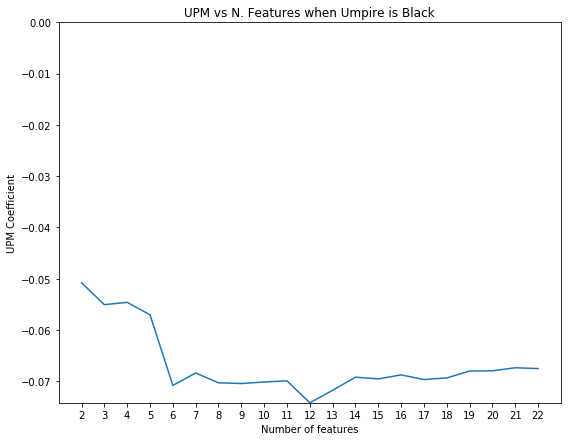

In [47]:
plot_beta(beta, n_features, "UPM vs N. Features when Umpire is Black", "upm_vs_n_black_umpire.png")

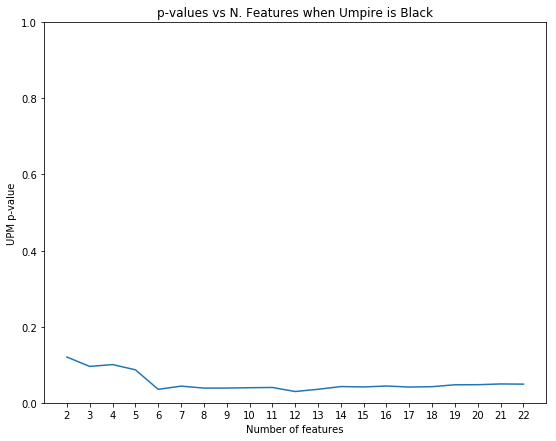

In [45]:
plot_pvalues(p, n_features, "p-values vs N. Features when Umpire is Black", "p_vs_n_black_umpire.png")

In [48]:
beta_black = beta[0]

In [49]:
p_black = p[0]

## Feature elimination effects for hispanic umpire

In [50]:
hispanic_umpire = cp_df[cp_df.umpire_race == 'hispanic']

In [51]:
%time X_hispanic, y_hispanic = prepare_df(hispanic_umpire)

CPU times: user 1.76 s, sys: 19.4 ms, total: 1.78 s
Wall time: 1.8 s


In [52]:
%time ranked_features = rank_features(X_hispanic, y_hispanic)

CPU times: user 1.76 s, sys: 61.1 ms, total: 1.82 s
Wall time: 1.84 s


In [53]:
%time nf, beta, p = eliminate_features(X_hispanic, y_hispanic, ranked_features)

Fitting 22 variables...
Optimization terminated successfully.
         Current function value: 0.576493
         Iterations 6
Beta = -0.0041892206799233975; p = 0.8595409313543707
Fitting 21 variables...
Optimization terminated successfully.
         Current function value: 0.576684
         Iterations 6
Beta = -0.00392317129230092; p = 0.8683529577985332
Fitting 20 variables...
Optimization terminated successfully.
         Current function value: 0.576701
         Iterations 6
Beta = -0.00416986417261148; p = 0.8601520526070399
Fitting 19 variables...
Optimization terminated successfully.
         Current function value: 0.576710
         Iterations 6
Beta = -0.003994959818704232; p = 0.8659561463000154
Fitting 18 variables...
Optimization terminated successfully.
         Current function value: 0.576717
         Iterations 6
Beta = -0.004289784305280286; p = 0.8561549211229252
Fitting 17 variables...
Optimization terminated successfully.
         Current function value: 0.576731
  

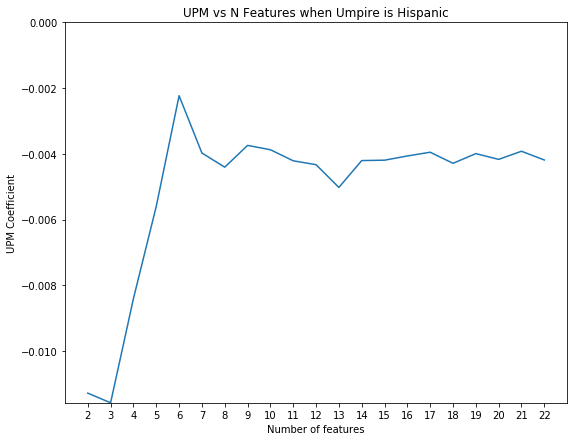

In [54]:
plot_beta(beta, nf, "UPM vs N Features when Umpire is Hispanic", "upm_vs_n_hispanic_umpire.png")

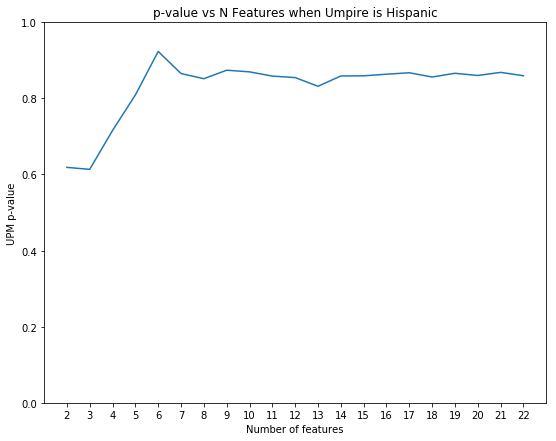

In [55]:
plot_pvalues(p, nf, "p-value vs N Features when Umpire is Hispanic", "p_vs_n_hispanic_umpire.png")

## Feature elimination effects when umpire is not white

In [60]:
def white_or_not(r):
    if r == 'white':
        return 'white'
    else:
        return 'nonwhite'

In [61]:
w_nw_df = cp_df

In [63]:
w_nw_df.umpire_race = w_nw_df.umpire_race.apply(white_or_not)

In [65]:
w_nw_df.pitcher_race = w_nw_df.pitcher_race.apply(white_or_not)

In [66]:
nonwhite_umpire = w_nw_df[w_nw_df.umpire_race == 'nonwhite']
nonwhite_umpire.head()

,count,home_pitcher,inning,run_diff,strike_given_called,pitcher_race,umpire_race
2642,0-0,1,1,0,False,white,nonwhite
2643,1-0,1,1,0,True,white,nonwhite
2644,1-1,1,1,0,False,white,nonwhite
2645,0-1,1,1,0,False,white,nonwhite
2646,0-0,1,1,0,False,white,nonwhite


In [67]:
%time X_nonwhite, y_nonwhite = prepare_df(nonwhite_umpire)

CPU times: user 4.3 s, sys: 48.6 ms, total: 4.35 s
Wall time: 4.08 s


In [68]:
ranked_features = rank_features(X_nonwhite, y_nonwhite)

In [69]:
ranked_features

['count_0-2',
 'count_1-2',
 'count_2-2',
 'count_3-0',
 'count_3-2',
 'count_0-1',
 'count_1-1',
 'count_2-1',
 'count_3-1',
 'count_1-0',
 'inning_3',
 'count_2-0',
 'inning_6',
 'inning_4',
 'inning_8',
 'inning_7',
 'inning_5',
 'inning_9+',
 'home_pitcher',
 'upm',
 'inning_2',
 'run_diff']

In [70]:
nf, beta, p = eliminate_features(X_nonwhite, y_nonwhite, ranked_features)

Fitting 22 variables...
Optimization terminated successfully.
         Current function value: 0.577946
         Iterations 6
Beta = -0.02373526488655271; p = 0.08765412973912415
Fitting 21 variables...
Optimization terminated successfully.
         Current function value: 0.578056
         Iterations 6
Beta = -0.02326483514238061; p = 0.09407965954696025
Fitting 20 variables...
Optimization terminated successfully.
         Current function value: 0.578057
         Iterations 6
Beta = -0.023234616969380357; p = 0.09450340107791404
Fitting 19 variables...
Optimization terminated successfully.
         Current function value: 0.578083
         Iterations 6
Beta = -0.023469910223820813; p = 0.09119590195145472
Fitting 18 variables...
Optimization terminated successfully.
         Current function value: 0.578096
         Iterations 6
Beta = -0.024278045098361355; p = 0.08043126992485021
Fitting 17 variables...
Optimization terminated successfully.
         Current function value: 0.57812

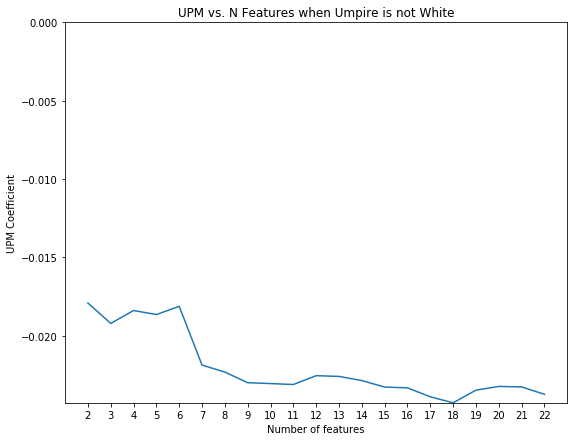

In [71]:
plot_beta(beta, nf, "UPM vs. N Features when Umpire is not White", "upm_vs_n_nonwhite_umpire.png")

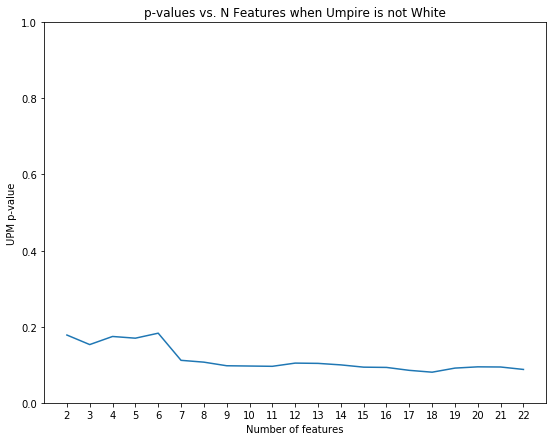

In [72]:
plot_pvalues(p, nf, "p-values vs. N Features when Umpire is not White", "p_vs_n_nonwhite_umpire.png")